In [140]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, levy_stable, ks_2samp

sys.path.insert(1, os.sep.join(["..", "packages"]))
from Levy_processes import *
from basicDistributionFunctions import *
from fractional_stable_motion import *
from ou_simulation import *

from mySweetCache import cache


In [9]:
T = np.arange(0, 2, 1)
T

array([0, 1])

In [141]:
Image_width = 10

In [142]:
N = 10 ** 3
dt = 0.01
T = N * dt # = 10
M = 10 ** 3

t = np.linspace(0, 1, N)
ps = [0.1, 0.3, 0.5, 0.7, 0.9]

# Brownian Motion

# 1.5-stable simetric Levy motin

## quantile lines

### Brownian motion

In [143]:
alpha = 2
beta = 0

X_Brownian_motion = Levy_processes(T, M, N, 2, 0)

In [144]:
@cache("Brounian_empirical_quantile")
def Brounian_empirical_quantile(ps, N, X_Brownian_motion):
    Quantile = np.zeros([len(ps), N])
    for Np, p in enumerate(ps):
        Quantile[Np,:] = np.squeeze(equantile_proces(X_Brownian_motion.T, p))
    return Quantile

@cache("Brounian_teoretical_quantile")
def Brounian_teoretical_quantile(ps, N, alpha, beta, T):
    Quantile_teoretic = np.zeros([len(ps),N])
    for Np, p in enumerate(ps):
        Quantile_teoretic[Np,:] = levy_stable.ppf(p, alpha, beta)

    for k in range(N):
        Quantile_teoretic[:,k] = Quantile_teoretic[:,k] * ((T * k / N) ** (1 / alpha))

    return Quantile_teoretic



In [145]:
Quantile = Brounian_empirical_quantile(ps, N, X_Brownian_motion)
Quantile_teoretic = Brounian_teoretical_quantile(ps, N, alpha, beta, T)


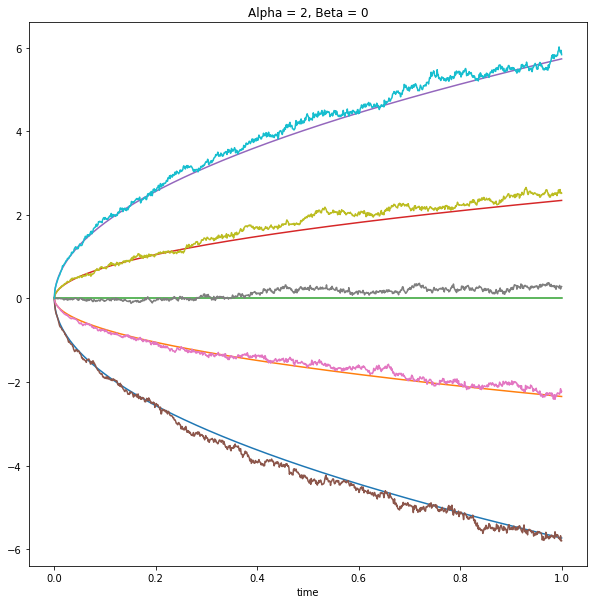

In [146]:
fig_q, axs_q = plt.subplots(nrows = 1, ncols = 1, figsize = ( Image_width, Image_width))
ax_q = axs_q;
ax_q.plot(t, Quantile_teoretic.T);
ax_q.plot(t, Quantile.T);
ax_q.set_xlabel("time")
ax_q.set_title(f"Alpha = {alpha}, Beta = {beta}");


### Alpha-stable 1.5

In [147]:
alpha15 = 1.5
beta15 = 0

X_1_5_stable_motion = Levy_processes(T, M, N, alpha15, beta15)

In [148]:

@cache("Brounian_empirical_quantile")
def Brounian_empirical_quantile(ps, N, X_1_5_stable_motion):
    Quantile = np.zeros([len(ps), N])
    for Np, p in enumerate(ps):
        Quantile[Np,:] = np.squeeze(equantile_proces(X_1_5_stable_motion.T, p))
    return Quantile

@cache("Brounian_teoretical_quantile")
def Brounian_teoretical_quantile(ps, N, alpha15, beta15, T):
    Quantile_teoretic = np.zeros([len(ps),N])
    for Np, p in enumerate(ps):
        Quantile_teoretic[Np,:] = levy_stable.ppf(p, alpha15, beta15)

    for k in range(N):
        Quantile_teoretic[:,k] = Quantile_teoretic[:,k] * ((T * k / N) ** (1 / alpha15))

    return Quantile_teoretic


In [149]:
Quantile15 = Brounian_empirical_quantile(ps, N, X_1_5_stable_motion)
Quantile_teoretic15 = Brounian_teoretical_quantile(ps, N, alpha15, beta15, T)


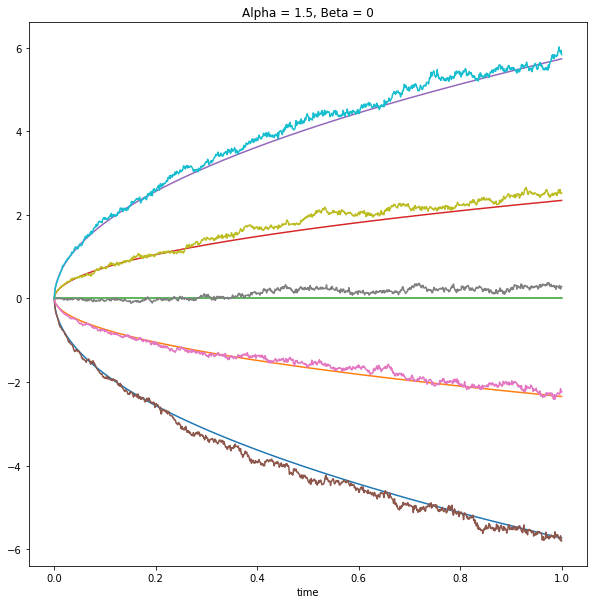

In [150]:
fig_q, axs_q = plt.subplots(nrows = 1, ncols = 1, figsize = ( Image_width, Image_width))
ax_q = axs_q;
ax_q.plot(t, Quantile_teoretic15.T);
ax_q.plot(t, Quantile15.T);
ax_q.set_xlabel("time")
ax_q.set_title(f"Alpha = {alpha15}, Beta = {beta15}");

### Fractional Brownian motion 0.3 & 0.7

In [151]:
T = np.arange(0, dt * 999, dt)

In [152]:
alpha = 2
beta = 0
@cache("get_FBS03")
def get_FBS03():
    return integral_form_simulation(0.3, 2, 0, N_trajectories=M)[1]

@cache("get_FBS07")
def get_FBS07():
    return integral_form_simulation(0.7, 2, 0, N_trajectories=M)[1]

FBS_03 = get_FBS03()
FBS_07 = get_FBS07()


In [153]:
Quantile_FBS_03 = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_FBS_03[Np,:] = np.squeeze(equantile_proces(FBS_03.T, p))

Quantile_FBS_07 = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_FBS_07[Np,:] = np.squeeze(equantile_proces(FBS_07.T, p))


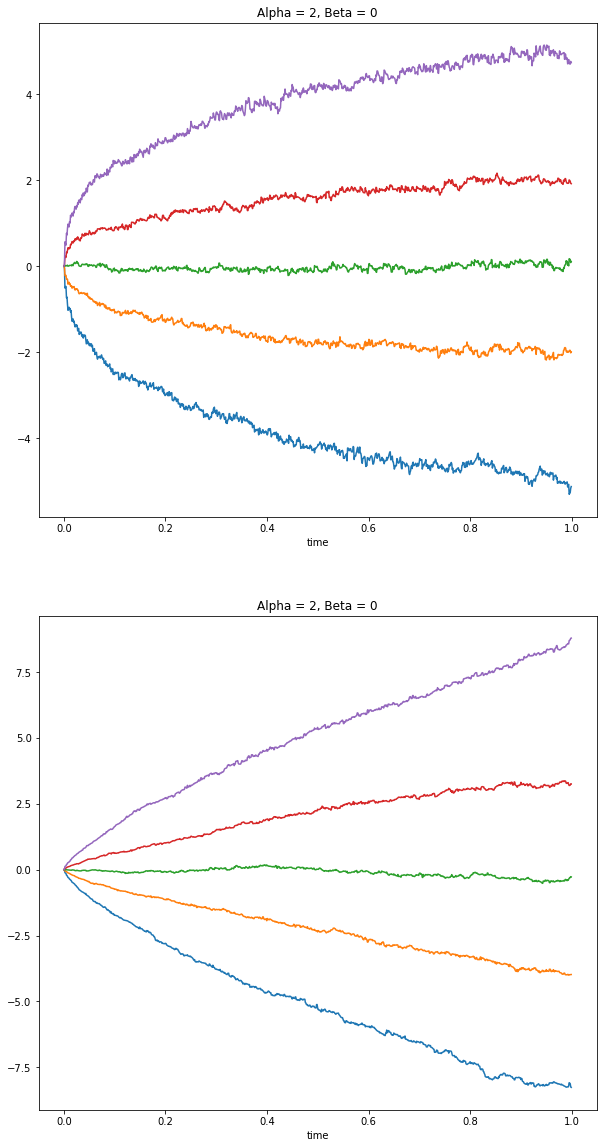

In [154]:
fig_q, axs_q = plt.subplots(nrows = 2, ncols = 1, figsize = ( Image_width, 2 * Image_width))
for i, X in enumerate([Quantile_FBS_03, Quantile_FBS_07]):
    ax_q = axs_q[i]
    ax_q.plot(t[:-1], X.T);
    ax_q.set_xlabel("time")
    ax_q.set_title(f"Alpha = {alpha}, Beta = {beta}");

### Fractional 1.5 Stable motion 0.3 & 0.7

In [155]:

@cache("get_FSM1_5_03")
def get_FSM1_5_03():
    return integral_form_simulation(0.3, 1.5, 0, N_trajectories=M)[1]

@cache("get_FSM1_5_07")
def get_FSM1_5_07():
    return integral_form_simulation(0.7, 1.5, 0, N_trajectories=M)[1]

FSM1_5_03 = get_FSM1_5_03()
FSM1_5_07 = get_FSM1_5_07()


In [156]:

Quantile_FSM1_5_03 = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_FSM1_5_03[Np,:] = np.squeeze(equantile_proces(FSM1_5_03.T, p))
    

Quantile_FSM1_5_07 = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_FSM1_5_07[Np,:] = np.squeeze(equantile_proces(FSM1_5_07.T, p))
    

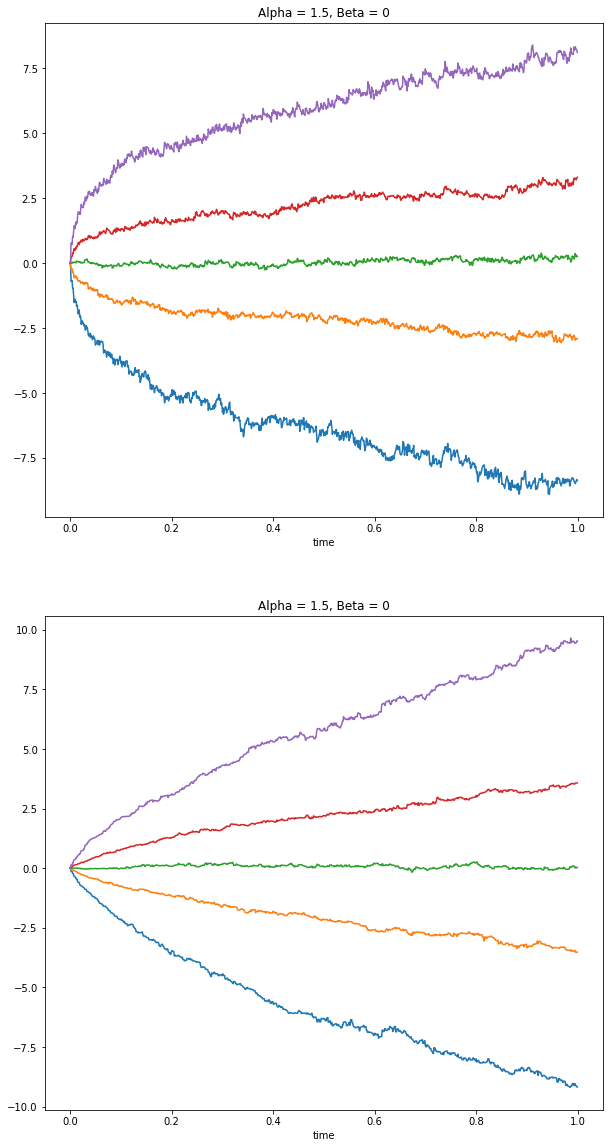

In [157]:
fig_q, axs_q = plt.subplots(nrows = 2, ncols = 1, figsize = ( Image_width, 2 * Image_width))
for i, X in enumerate([Quantile_FSM1_5_03, Quantile_FSM1_5_07]):
    ax_q = axs_q[i]
    ax_q.plot(t[:-1], X.T);
    ax_q.set_xlabel("time")
    ax_q.set_title(f"Alpha = {alpha15}, Beta = {beta15}");

### Ornstein-Uhlenbeck process

In [158]:

@cache("get_OUP")
def get_OUP():
    return integral_form_ou_simulation(lam = 2, sigma = 2, alpha = 2, beta = 0, M1 = -100, M2 = 100, N_trajectories = M, I = 10000, dt = 0.01)[1]

OUP = get_OUP()

In [159]:

Quantile_OUP = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_OUP[Np,:] = np.squeeze(equantile_proces(OUP.T, p))
    

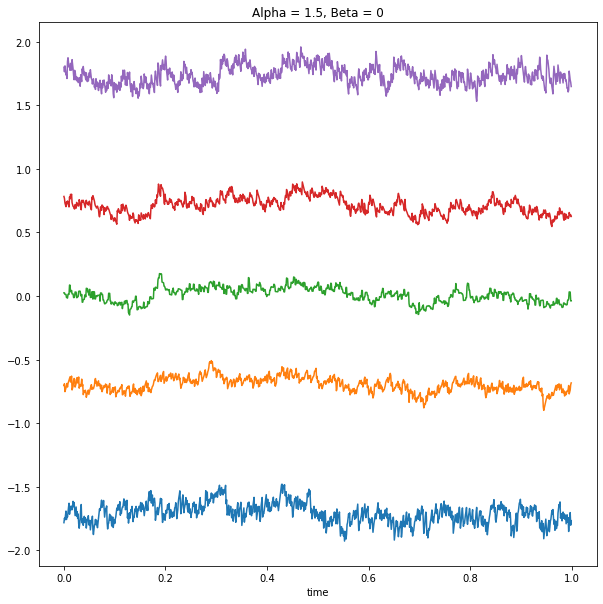

In [160]:
fig_q, axs_q = plt.subplots(nrows = 1, ncols = 1, figsize = ( Image_width, Image_width))
ax_q = axs_q
ax_q.plot(t[:-1], Quantile_OUP.T);
ax_q.set_xlabel("time")
ax_q.set_title(f"Alpha = {alpha15}, Beta = {beta15}");

## self-similar

### Brownian Motion

In [161]:
c = 4

In [162]:

N_scaled = int(c ** (-alpha) * N)

X1 = X_Brownian_motion[-1, :int(M//2)]
X2 = c * X_Brownian_motion[N_scaled, int(M//2):]

p_val = ks_2samp(X1, X2)
print(p_val)

KstestResult(statistic=0.044, pvalue=0.7189191850204419)


### Alpha-stable 1.5

In [163]:
c = 8


In [164]:

N_scaled = int(c ** (-alpha15) * N)

X1 = X_1_5_stable_motion[-1, :int(M//2)]
X2 = c * X_1_5_stable_motion[N_scaled, int(M//2):]

p_val = ks_2samp(X1, X2)
print(p_val)

KstestResult(statistic=0.058, pvalue=0.3699050405997647)


### Fractional Brownian motion 0.3 & 0.7

#### H = 0.3

In [165]:
H = 0.3
N_scaled = int(c ** (-H) * N)

X1 = FBS_03[-1, :int(M//2)]
X2 = c * FBS_03[N_scaled, int(M//2):]

p_val = ks_2samp(X1, X2)
print(p_val)

KstestResult(statistic=0.394, pvalue=4.98054948987324e-35)


#### H = 0.7

In [166]:
H = 0.7
N_scaled = int(c ** (-H) * N)

X1 = FBS_03[-1, :int(M//2)]
X2 = c * FBS_03[N_scaled, int(M//2):]

p_val = ks_2samp(X1, X2)
print(p_val)

KstestResult(statistic=0.342, pvalue=2.569002299357289e-26)


### Fractional 1.5 Stable motion 0.3 & 0.7

#### H = 0.3

In [167]:
H = 0.3
N_scaled = int(c ** (-H) * N)

X1 = FSM1_5_03[-1, :int(M//2)]
X2 = c * FSM1_5_03[N_scaled, int(M//2):]

p_val = ks_2samp(X1, X2)
print(p_val)

KstestResult(statistic=0.332, pvalue=8.535314188970944e-25)


#### H = 0.7

In [168]:
H = 0.7
N_scaled = int(c ** (-H) * N)

X1 = FSM1_5_07[-1, :int(M//2)]
X2 = c * FSM1_5_07[N_scaled, int(M//2):]

p_val = ks_2samp(X1, X2)
print(p_val)

KstestResult(statistic=0.26, pvalue=2.931154045000726e-15)


### Ornstein-Uhlenbeck process

## Characteristic function

### Brownian motion

In [169]:
N_char = 10 ** 2
t_char = np.linspace(-3,3, N_char)


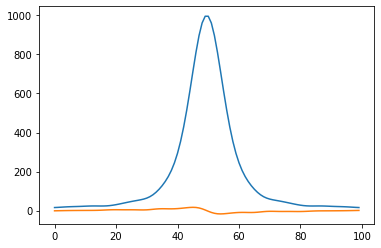

In [170]:
phi = characteristic_proces_r_i(t_char, X_Brownian_motion)

plt.plot(phi[0])
plt.plot(phi[1])


### 1.5 stable motion

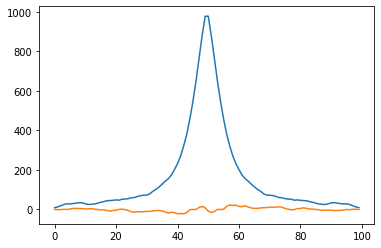

In [171]:
phi = characteristic_proces_r_i(t_char, X_1_5_stable_motion)

plt.plot(phi[0])
plt.plot(phi[1])

### Fractional Brownian motion 0.3 & 0.7

### H = 0.3

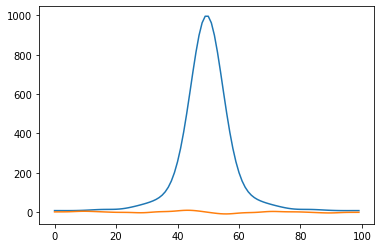

In [172]:
phi_FBS_03 = characteristic_proces_r_i(t_char, FBS_03)

plt.plot(phi_FBS_03[0])
plt.plot(phi_FBS_03[1])


### H = 0.7

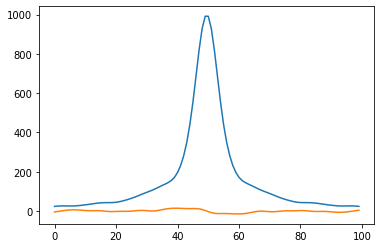

In [173]:
phi_FBS_07 = characteristic_proces_r_i(t_char, FBS_07)

plt.plot(phi_FBS_07[0])
plt.plot(phi_FBS_07[1])


### Fractional 1.5 Stable motion 0.3 & 0.7

### H = 0.3

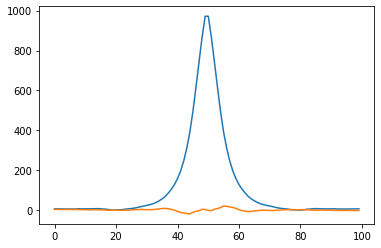

In [174]:
phi_FSM1_5_03 = characteristic_proces_r_i(t_char, FSM1_5_03)

plt.plot(phi_FSM1_5_03[0])
plt.plot(phi_FSM1_5_03[1])


### H = 0.7

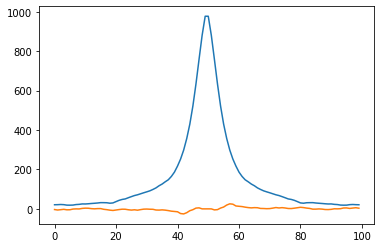

In [175]:
phi_FSM1_5_07 = characteristic_proces_r_i(t_char, FSM1_5_07)

plt.plot(phi_FSM1_5_07[0])
plt.plot(phi_FSM1_5_07[1])


### Ornstein-Uhlenbeck process

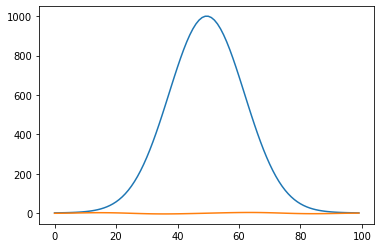

In [176]:
phi_OUP = characteristic_proces_r_i(t_char, OUP)

plt.plot(phi_OUP[0])
plt.plot(phi_OUP[1])


## TAMSD EAMSD EATAMSD

In [177]:

# EAMSD = np.zeros((7, N - 1))
# EATAMSD = np.zeros((7, N - 1))

proceses = (
    ("Brownian", X_Brownian_motion),
    ("1.5 Alpha Stable", X_1_5_stable_motion),
    ("Fractional Brownian process H=0.3", FBS_03),
    ("Fractional Brownian process H=0.7", FBS_07),
    ("Fractional 1.5 Stable process H=0.3", FSM1_5_03),
    ("Fractional 1.5 Stable process H=0.7", FSM1_5_07),
    ("O-U process", OUP),
    )
names_proceses = (
    "Brownian",
    "1.5 Alpha Stable",
    "Fractional Brownian process H=0.3",
    "Fractional Brownian process H=0.7",
    "Fractional 1.5 Stable process H=0.3",
    "Fractional 1.5 Stable process H=0.7",
    "O-U process",
    )

In [178]:
@cache("TAMSDs")
def get_TAMSDs(proceses):
    TAMSD_matrix = np.zeros((len(proceses), len(proceses[0][1] - 1)))
    for i, (name, proces) in enumerate(proceses):
        for tau in range(N - 1):
            TAMSD_matrix[i][tau] = TAMSD(proces[:,0], tau)
    return TAMSD_matrix

@cache("EAMSDs")
def get_EAMSDs(proceses):
    EAMSD_matrix = np.zeros((len(proceses), len(proceses[0][1] - 1)))
    for i, (name, proces) in enumerate(proceses):
        for tau in range(N - 1):
            EAMSD_matrix[i][tau] = EAMSD(proces, tau)
    return EAMSD_matrix

@cache("EATAMSDs")
def get_EATAMSDs(proceses):
    EATAMSDs_matrix = np.zeros((len(proceses), len(proceses[0][1] - 1)))
    for i, (name, proces) in enumerate(proceses):
        for tau in range(N - 1):
            EATAMSDs_matrix[i][tau] = EATAMSD(proces, tau)
    return EATAMSDs_matrix

TAMSDs = get_TAMSDs(proceses)
EAMSDs = get_EAMSDs(proceses)
EATAMSDs = get_EATAMSDs(proceses)


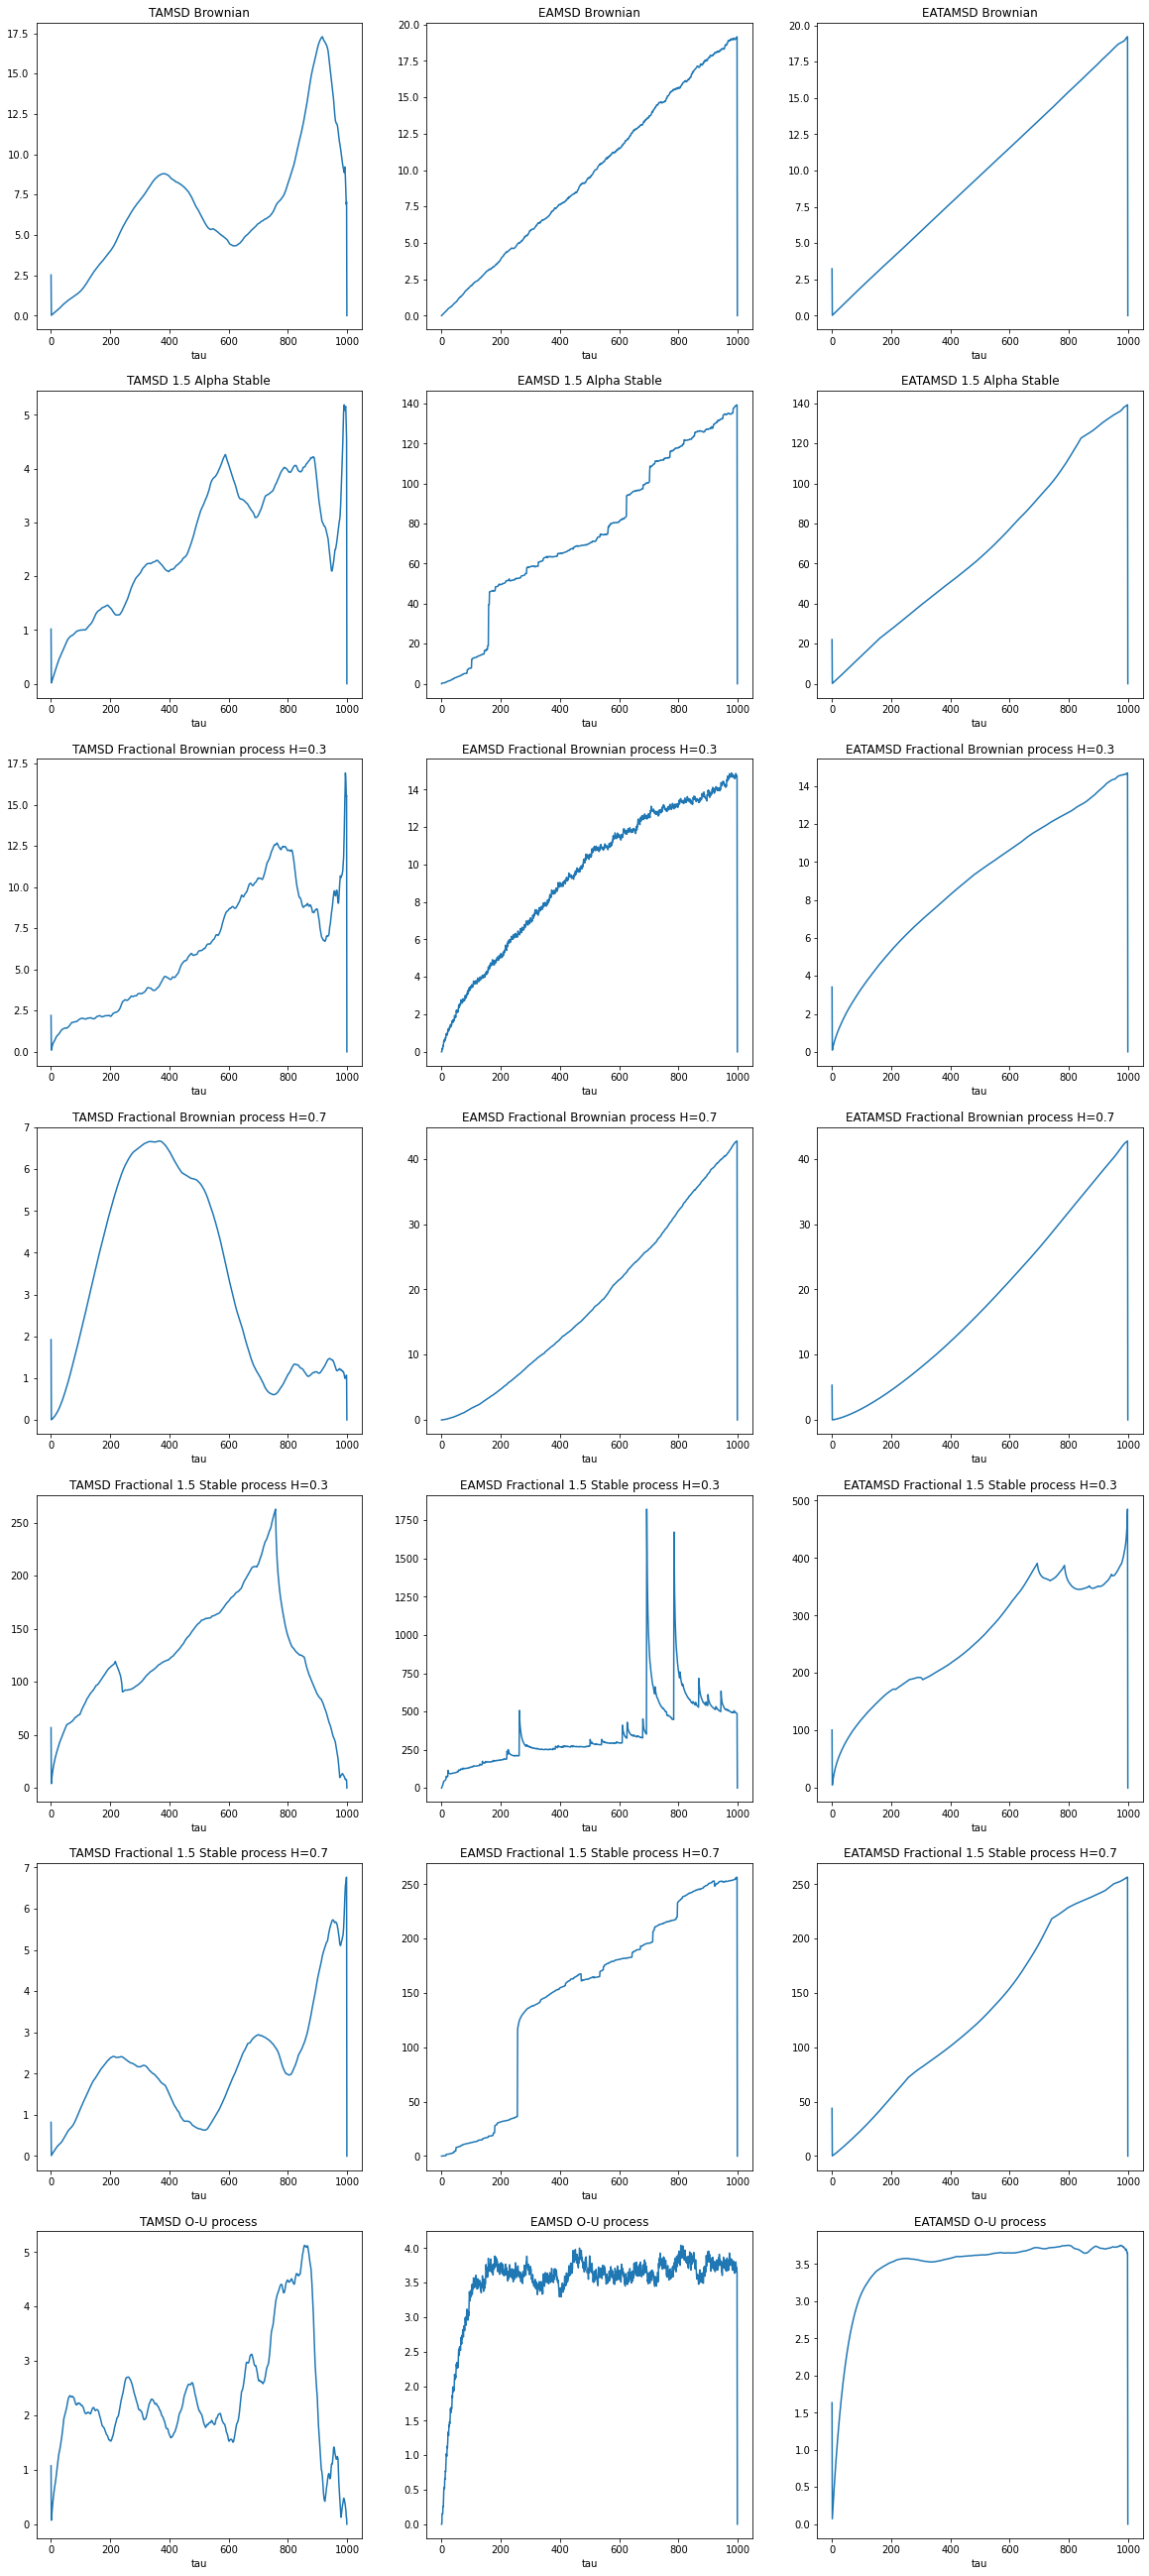

In [179]:
fig_q, axs_q = plt.subplots(nrows = 7, ncols = 3, figsize = (2 * Image_width, 7 * 2 / 3 * Image_width)) # Image_width as 1.5 Image_width


for i, name in enumerate(names_proceses):
    ax_q = axs_q[i, 0]
    ax_q.plot(TAMSDs[i,:]);
    ax_q.set_xlabel("tau")
    ax_q.set_title(f"TAMSD {name}");    
    ax_q = axs_q[i, 1]
    ax_q.plot(EAMSDs[i,:]);
    ax_q.set_xlabel("tau")
    ax_q.set_title(f"EAMSD {name}");
    ax_q = axs_q[i, 2]
    ax_q.plot(EATAMSDs[i,:]);
    ax_q.set_xlabel("tau")
    ax_q.set_title(f"EATAMSD {name}");



## Confidence intervals

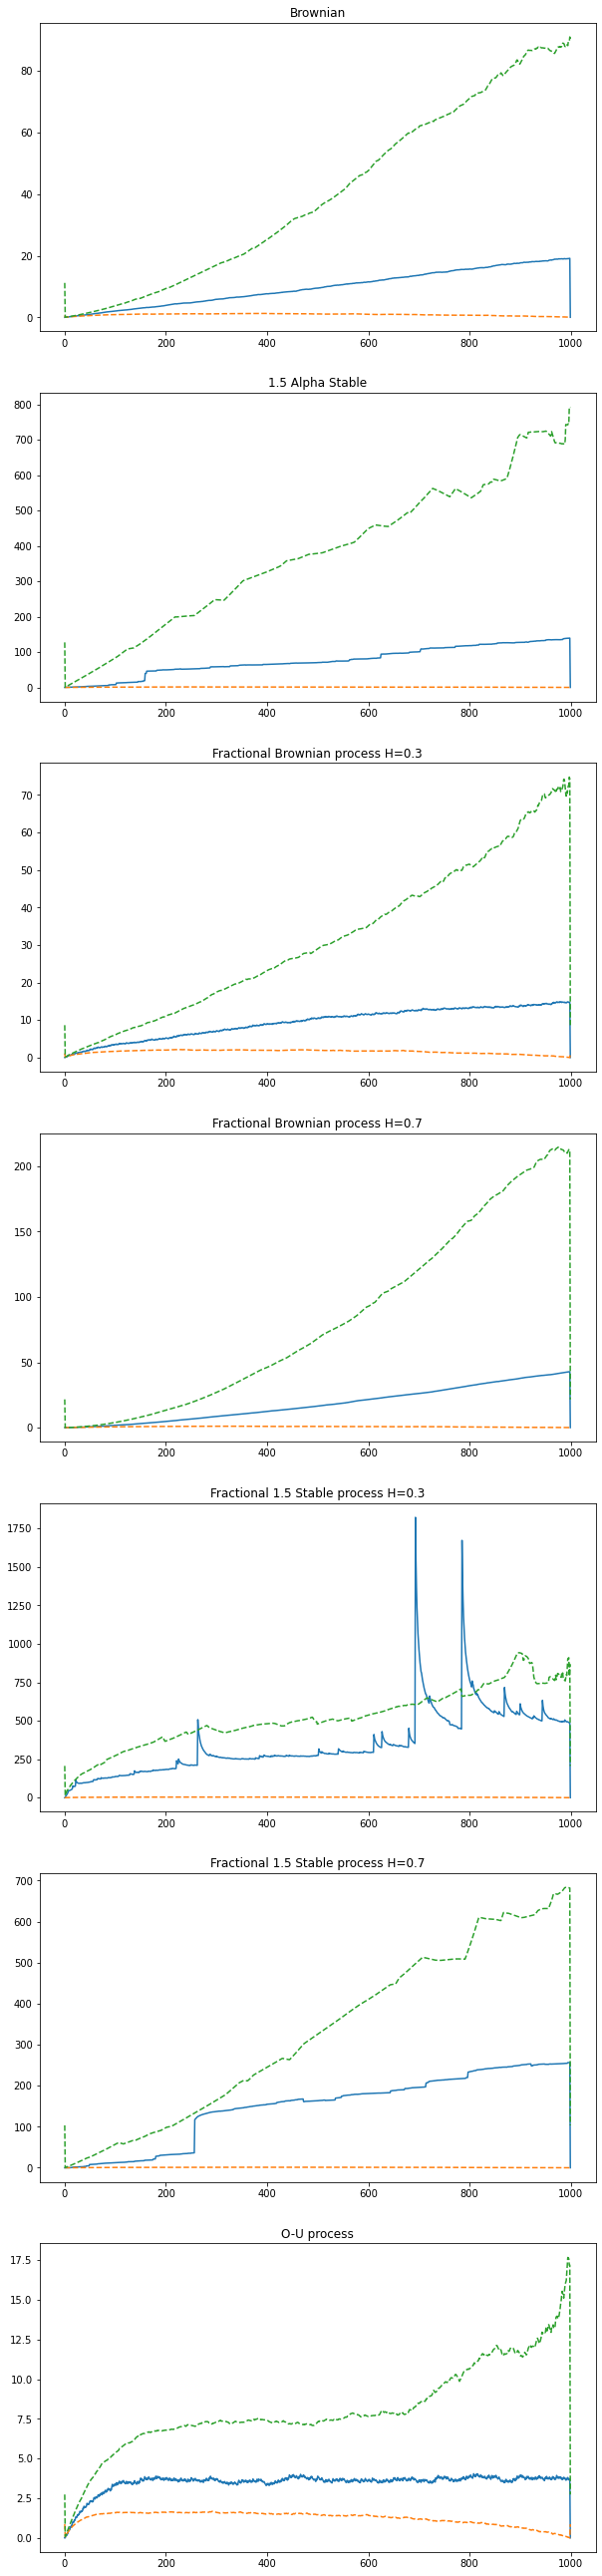

In [183]:
taus = np.arange(0, N, 1)
fig, axs = plt.subplots(nrows = 7, figsize = (Image_width, 7 * 2 / 3 * Image_width)) # Image_width as 1.5 Image_width

for i, (name, proces) in enumerate(proceses):
    lower, upper = TAMSD_confidence_intervals(proces, taus, alpha = 0.05)
    ax = axs[i]
    ax.plot(EAMSDs[i,:])
    ax.plot(lower, '--')
    ax.plot(upper, '--')
    ax.set_title(name)


## Distribution

### Brownian motion

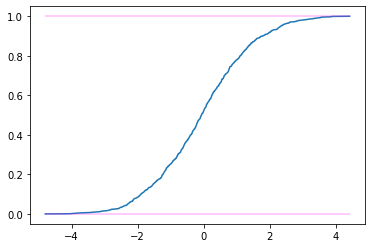

In [181]:
x = CDF2(X_Brownian_motion[100,:])[0]
plt.plot(x, np.linspace(0,1, len(x)));

plt.plot(x, x * 0 + 1, color = "magenta", linewidth = 0.4);
plt.plot(x, x * 0, color = "magenta", linewidth = 0.4);

### 1.5 stable

(-10.0, 10.0)

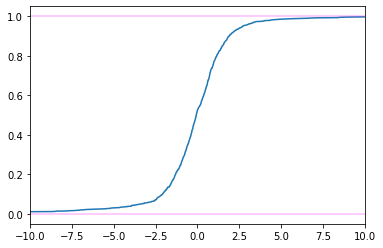

In [182]:
x = CDF2(X_1_5_stable_motion[100,:])[0]
plt.plot(x, np.linspace(0,1, len(x)));
plt.plot(x, x * 0 + 1, color = "magenta", linewidth = 0.4);
plt.plot(x, x * 0, color = "magenta", linewidth = 0.4);
# plt.plot(x, np.linspace(0,1, len(x)));
plt.xlim([-10, 10])
